<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
#!pip install pandas
#!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2026-01-01 21:08:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  39.3MB/s    in 4.3s    

2026-01-01 21:08:43 (35.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [9]:
import numpy as np
import pandas as pd

def to_num(s):
    return pd.to_numeric(s, errors="coerce")

def parse_age_mid(age):
    if pd.isna(age): return np.nan
    s = str(age)
    m = pd.Series([s]).str.extract(r"(\d+)\s*-\s*(\d+)").astype(float)
    if not m.isna().all(axis=None):
        return float(m.mean(axis=1).iloc[0])
    if "Under" in s: return 16.0
    if "or older" in s: return 70.0
    return np.nan

def parse_years(x):
    if pd.isna(x): return np.nan
    if isinstance(x, str):
        t = x.strip().lower()
        if t.startswith("less"): return 0.5
        if t.startswith("more"): return 51.0
        if t == "none": return np.nan
    return pd.to_numeric(x, errors="coerce")

def cap_money(x, max_cap=5_000_000):
    x = to_num(x)
    x = x.where((x > 0) & (x < max_cap))
    return x

def map_sopartfreq(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    if "daily" in s: return 5
    if "few times per week" in s or "weekly" in s: return 4
    if "few times per month" in s or "monthly" in s: return 3
    if "few times per year" in s or "year" in s: return 2
    if "never" in s: return 1
    return np.nan

dfc = df.copy()

# Core numeric conversions
dfc["AgeNum"] = dfc["Age"].apply(parse_age_mid)
dfc["YearsCodePro_num"] = dfc["YearsCodePro"].apply(parse_years)

dfc["ConvertedCompYearly_num"] = cap_money(dfc.get("ConvertedCompYearly"))
dfc["CompTotal_num"] = cap_money(dfc.get("CompTotal"))

# Satisfaction columns (your CSV often uses these as numeric already)
dfc["JobSat_num"] = to_num(dfc.get("JobSat"))
dfc["JobSatPoints_6_num"] = to_num(dfc.get("JobSatPoints_6"))

# Participation frequency
dfc["SOPartFreq_score"] = dfc.get("SOPartFreq").apply(map_sopartfreq) if "SOPartFreq" in dfc.columns else np.nan

# Helpful “first item” for multi-select roles
if "DevType" in dfc.columns:
    dfc["DevType_first"] = dfc["DevType"].astype(str).str.split(";").str[0].str.strip()
else:
    dfc["DevType_first"] = np.nan

print("Cleaned dfc shape:", dfc.shape)
print(dfc[["AgeNum","YearsCodePro_num","ConvertedCompYearly_num","JobSat_num","JobSatPoints_6_num","SOPartFreq_score"]].notna().sum())


Cleaned dfc shape: (65437, 122)
AgeNum                     65115
YearsCodePro_num           51610
ConvertedCompYearly_num    23431
JobSat_num                 29126
JobSatPoints_6_num         29450
SOPartFreq_score           44796
dtype: int64


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


Rows: 23103
SOPartFreq_score
1.0     4828
3.0    12930
4.0     4793
5.0      552
Name: count, dtype: int64


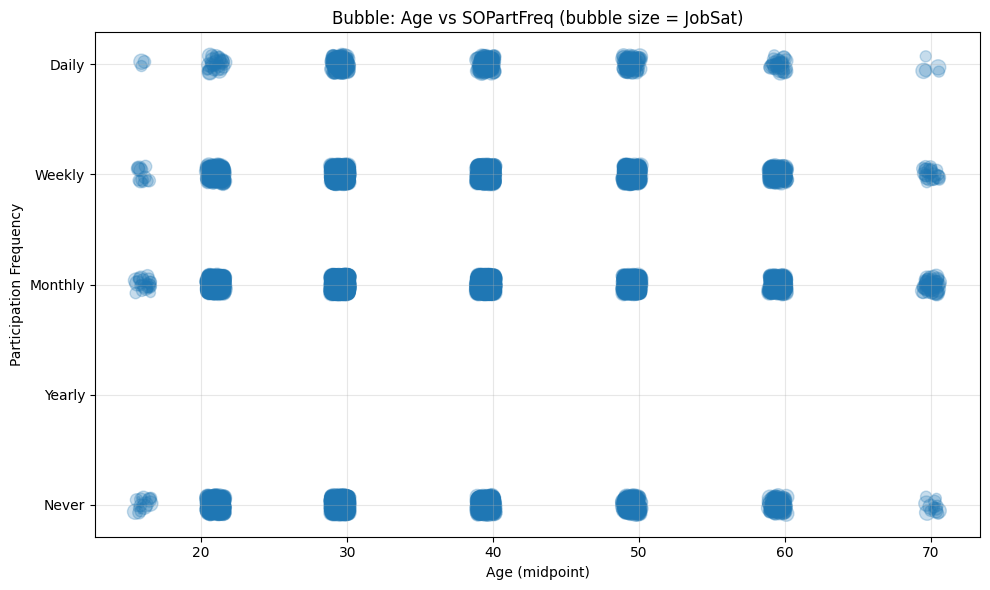

In [10]:
d = dfc.dropna(subset=["AgeNum","SOPartFreq_score","JobSat_num"]).copy()
d = d[(d["JobSat_num"] >= 0) & (d["JobSat_num"] <= 10)]
print("Rows:", len(d))
print(d["SOPartFreq_score"].value_counts().sort_index())

sizes = (d["JobSat_num"] + 1)**2
x = d["AgeNum"] + np.random.uniform(-0.6, 0.6, size=len(d))
y = d["SOPartFreq_score"] + np.random.uniform(-0.08, 0.08, size=len(d))

plt.figure(figsize=(10,6))
plt.scatter(x, y, s=sizes, alpha=0.25)
plt.title("Bubble: Age vs SOPartFreq (bubble size = JobSat)")
plt.xlabel("Age (midpoint)")
plt.ylabel("Participation Frequency")
plt.yticks([1,2,3,4,5], ["Never","Yearly","Monthly","Weekly","Daily"])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


Rows: 16064


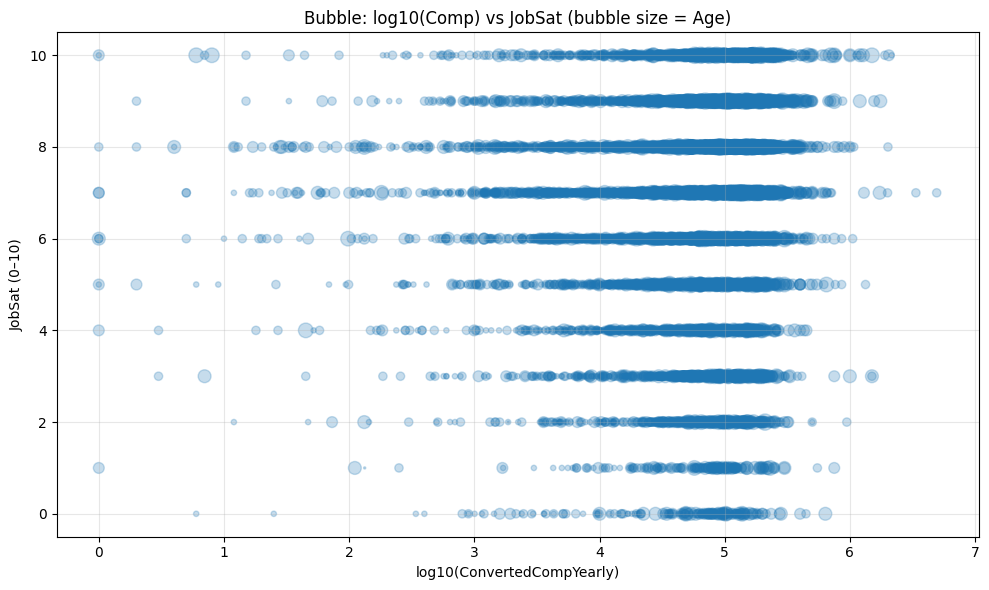

In [11]:
d = dfc.dropna(subset=["ConvertedCompYearly_num","JobSat_num","AgeNum"]).copy()
d = d[(d["JobSat_num"] >= 0) & (d["JobSat_num"] <= 10)]
print("Rows:", len(d))

d["Comp_log10"] = np.log10(d["ConvertedCompYearly_num"])
sizes = (d["AgeNum"] - d["AgeNum"].min() + 1) * 2.5

plt.figure(figsize=(10,6))
plt.scatter(d["Comp_log10"], d["JobSat_num"], s=sizes, alpha=0.25)
plt.title("Bubble: log10(Comp) vs JobSat (bubble size = Age)")
plt.xlabel("log10(ConvertedCompYearly)")
plt.ylabel("JobSat (0–10)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



Rows before explode: 54006
Age group counts:
Age
25-34 years old    21755
35-44 years old    13909
18-24 years old    12432
45-54 years old     5910
Name: count, dtype: int64
Rows after explode: 291441
Points plotted: 48
           AgeGroup    Language  count  x  y    size
19  25-34 years old  JavaScript  13691  1  0  2738.2
17  25-34 years old    HTML/CSS  11253  1  1  2250.6
22  25-34 years old         SQL  11037  1  2  2207.4
21  25-34 years old      Python  10927  1  3  2185.4
23  25-34 years old  TypeScript   9459  1  4  1891.8
31  35-44 years old  JavaScript   8573  2  0  1714.6
7   18-24 years old  JavaScript   8518  0  0  1703.6
9   18-24 years old      Python   7868  0  3  1573.6
5   18-24 years old    HTML/CSS   7724  0  1  1544.8
34  35-44 years old         SQL   7451  2  2  1490.2


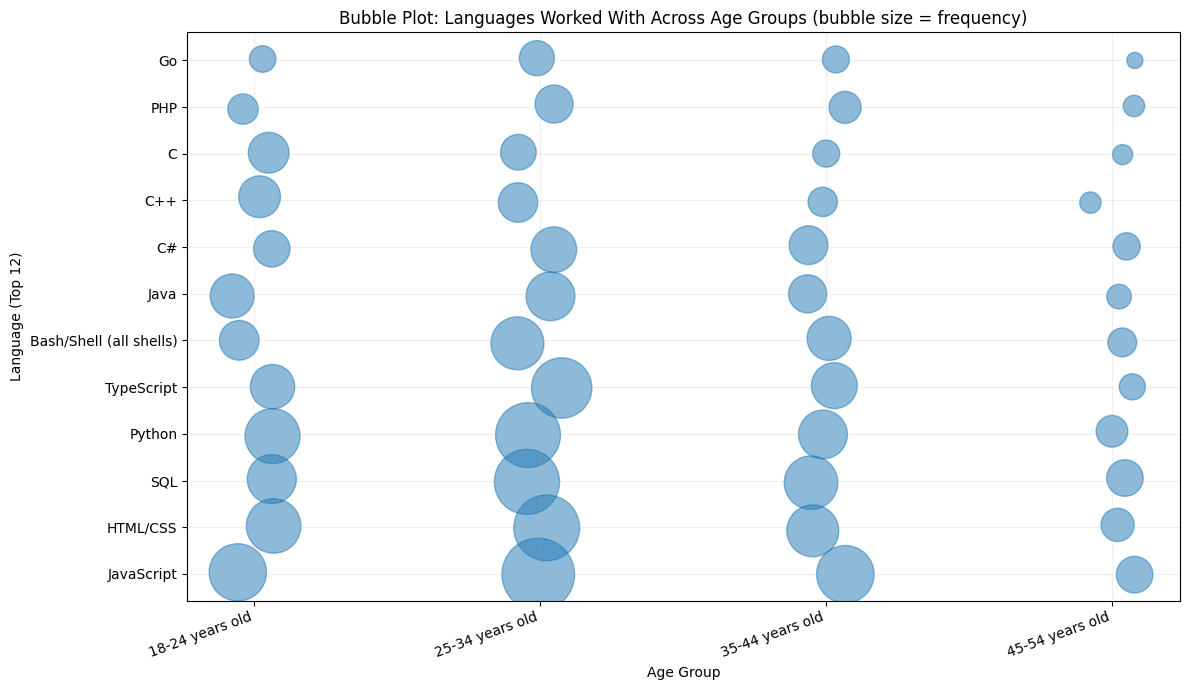

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Use cleaned dfc (from your pre-clean pipeline)
# Needed columns: Age, AgeNum, LanguageHaveWorkedWith

d0 = dfc.dropna(subset=["Age", "AgeNum", "LanguageHaveWorkedWith"]).copy()

# Choose a few age groups to keep the plot readable (you can expand this list)
age_groups = [
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old"
]
d0 = d0[d0["Age"].isin(age_groups)]

print("Rows before explode:", len(d0))
print("Age group counts:")
print(d0["Age"].value_counts())

# Explode multi-select languages
lang = d0["LanguageHaveWorkedWith"].astype(str).str.split(";").explode().str.strip()

# Repeat Age values to match exploded rows
rep = d0["LanguageHaveWorkedWith"].astype(str).str.count(";").add(1).to_numpy()
age_rep = np.repeat(d0["Age"].to_numpy(), rep)

tmp = pd.DataFrame({"AgeGroup": age_rep, "Language": lang}).dropna()
print("Rows after explode:", len(tmp))

# Keep top 12 languages overall for readability
top_langs = tmp["Language"].value_counts().head(12).index.tolist()
tmp = tmp[tmp["Language"].isin(top_langs)]

# Count frequency per (AgeGroup, Language)
freq = tmp.groupby(["AgeGroup", "Language"]).size().reset_index(name="count")

# ---- Convert categorical x/y to numeric positions for scatter ----
age_order = age_groups
lang_order = top_langs

age_to_x = {a:i for i, a in enumerate(age_order)}
lang_to_y = {l:i for i, l in enumerate(lang_order)}

freq["x"] = freq["AgeGroup"].map(age_to_x)
freq["y"] = freq["Language"].map(lang_to_y)

# Bubble size proportional to frequency
# Scale factor controls how big bubbles appear
scale = 0.2
freq["size"] = freq["count"] * scale

print("Points plotted:", len(freq))
print(freq.sort_values("count", ascending=False).head(10))

# Add slight jitter so overlapping bubbles are visible
jx = np.random.uniform(-0.08, 0.08, size=len(freq))
jy = np.random.uniform(-0.08, 0.08, size=len(freq))

plt.figure(figsize=(12,7))
plt.scatter(freq["x"] + jx, freq["y"] + jy, s=freq["size"], alpha=0.5)

plt.title("Bubble Plot: Languages Worked With Across Age Groups (bubble size = frequency)")
plt.xlabel("Age Group")
plt.ylabel("Language (Top 12)")
plt.xticks(range(len(age_order)), age_order, rotation=20, ha="right")
plt.yticks(range(len(lang_order)), lang_order)

plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


                           avg_age  count
Language                                 
Python                   32.314518  24927
JavaScript               32.687640  23681
SQL                      33.811022  22328
HTML/CSS                 32.402105  20619
TypeScript               31.645207  20185
Rust                     30.719423  17170
Go                       30.949641  13801
Bash/Shell (all shells)  33.099466  13668
C#                       33.549712  12864
C++                      30.236747  10790


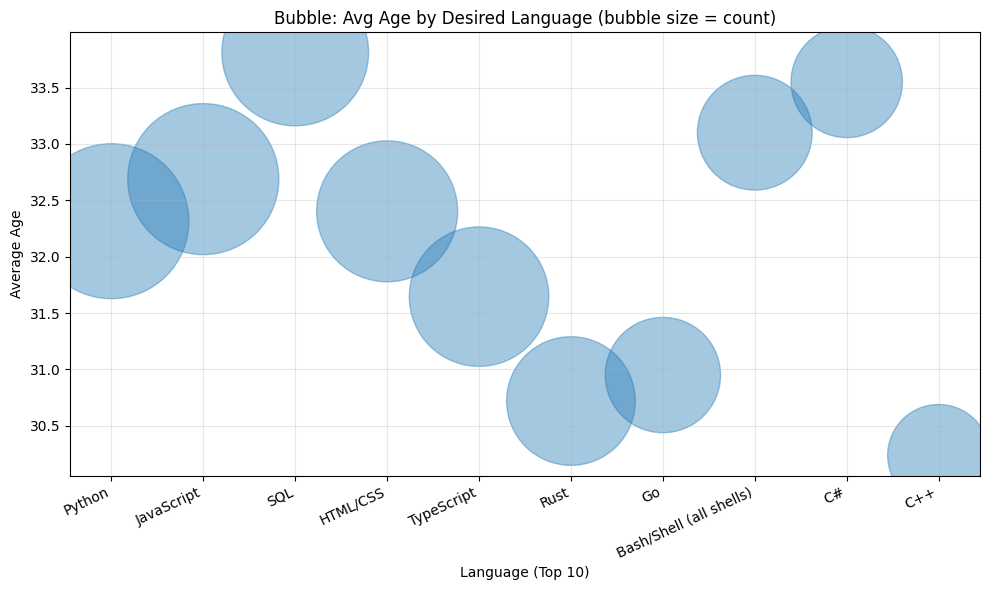

In [12]:
# This is languagewanttoworkwith
d0 = dfc.dropna(subset=["AgeNum","LanguageWantToWorkWith"]).copy()

langs = d0["LanguageWantToWorkWith"].astype(str).str.split(";").explode().str.strip()
rep = d0["LanguageWantToWorkWith"].astype(str).str.count(";").add(1).to_numpy()
age_rep = np.repeat(d0["AgeNum"].to_numpy(), rep)

tmp = pd.DataFrame({"Language": langs, "AgeNum": age_rep}).dropna()
top = tmp["Language"].value_counts().head(10).index.tolist()
tmp = tmp[tmp["Language"].isin(top)]

agg = tmp.groupby("Language").agg(avg_age=("AgeNum","mean"), count=("AgeNum","size")).reindex(top)
print(agg)

x = np.arange(len(agg))
sizes = agg["count"] * 0.5

plt.figure(figsize=(10,6))
plt.scatter(x, agg["avg_age"], s=sizes, alpha=0.4)
plt.title("Bubble: Avg Age by Desired Language (bubble size = count)")
plt.xlabel("Language (Top 10)")
plt.ylabel("Average Age")
plt.xticks(x, agg.index, rotation=25, ha="right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


                      avg_jobsat  count
Database                               
PostgreSQL              6.941633  13261
SQLite                  6.923458   6859
Redis                   6.976072   6436
MySQL                   6.982421   5973
MongoDB                 6.903802   5655
Microsoft SQL Server    7.065005   4615
Elasticsearch           6.995094   3873
MariaDB                 6.989681   3101
Dynamodb                7.083256   2150
BigQuery                6.947997   1423


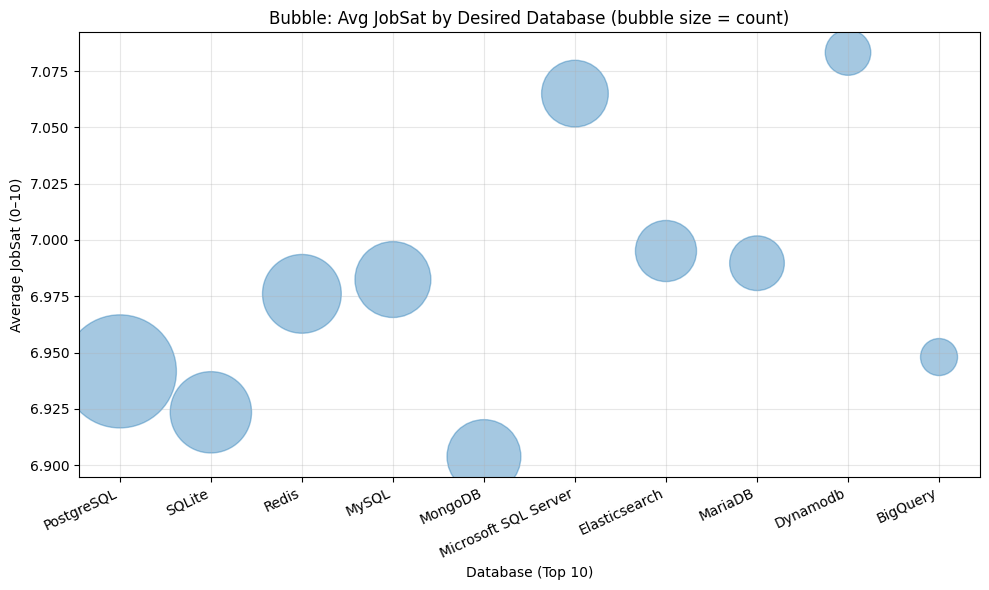

In [13]:
d0 = dfc.dropna(subset=["DatabaseWantToWorkWith","JobSat_num"]).copy()
d0 = d0[(d0["JobSat_num"] >= 0) & (d0["JobSat_num"] <= 10)]

dbs = d0["DatabaseWantToWorkWith"].astype(str).str.split(";").explode().str.strip()
rep = d0["DatabaseWantToWorkWith"].astype(str).str.count(";").add(1).to_numpy()
sat_rep = np.repeat(d0["JobSat_num"].to_numpy(), rep)

tmp = pd.DataFrame({"Database": dbs, "JobSat": sat_rep}).dropna()
top = tmp["Database"].value_counts().head(10).index.tolist()
tmp = tmp[tmp["Database"].isin(top)]

agg = tmp.groupby("Database").agg(avg_jobsat=("JobSat","mean"), count=("JobSat","size")).reindex(top)
print(agg)

x = np.arange(len(agg))
sizes = agg["count"] * 0.5

plt.figure(figsize=(10,6))
plt.scatter(x, agg["avg_jobsat"], s=sizes, alpha=0.4)
plt.title("Bubble: Avg JobSat by Desired Database (bubble size = count)")
plt.xlabel("Database (Top 10)")
plt.ylabel("Average JobSat (0–10)")
plt.xticks(x, agg.index, rotation=25, ha="right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Interpretation: Higher bubbles on y-axis = higher average satisfaction; larger bubbles = more popular databases.

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


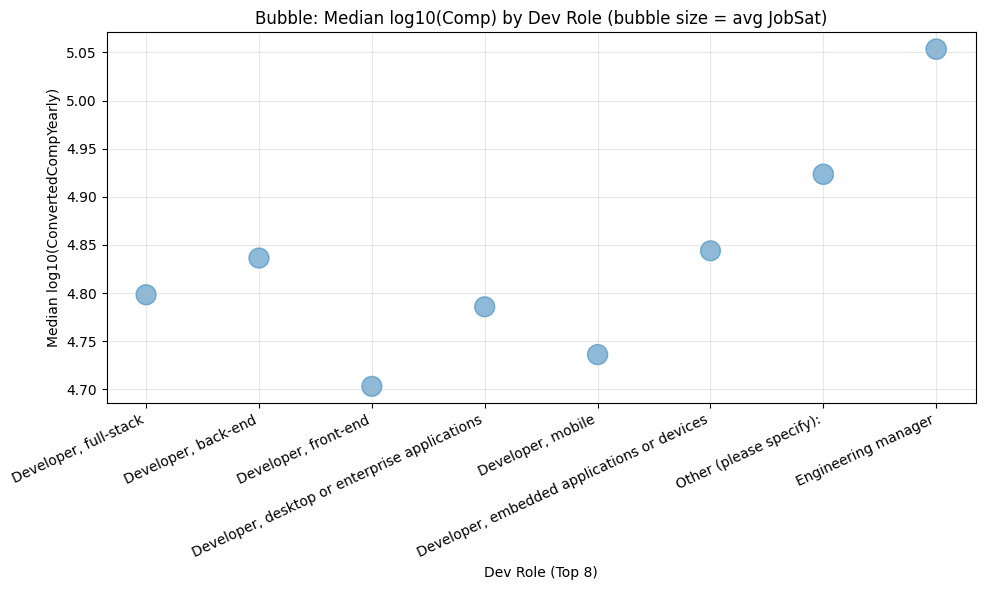

In [14]:
d = dfc.dropna(subset=["DevType_first","ConvertedCompYearly_num","JobSat_num"]).copy()
d = d[(d["JobSat_num"] >= 0) & (d["JobSat_num"] <= 10)]
d["Comp_log10"] = np.log10(d["ConvertedCompYearly_num"])

top_roles = d["DevType_first"].value_counts().head(8).index.tolist()
d = d[d["DevType_first"].isin(top_roles)]

agg = d.groupby("DevType_first").agg(
    med_comp=("Comp_log10","median"),
    avg_jobsat=("JobSat_num","mean"),
    n=("JobSat_num","size")
).reindex(top_roles)

x = np.arange(len(agg))
sizes = agg["avg_jobsat"] * 30

plt.figure(figsize=(10,6))
plt.scatter(x, agg["med_comp"], s=sizes, alpha=0.5)
plt.title("Bubble: Median log10(Comp) by Dev Role (bubble size = avg JobSat)")
plt.xlabel("Dev Role (Top 8)")
plt.ylabel("Median log10(ConvertedCompYearly)")
plt.xticks(x, agg.index, rotation=25, ha="right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Higher y = higher pay by role; larger bubbles = higher satisfaction.

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


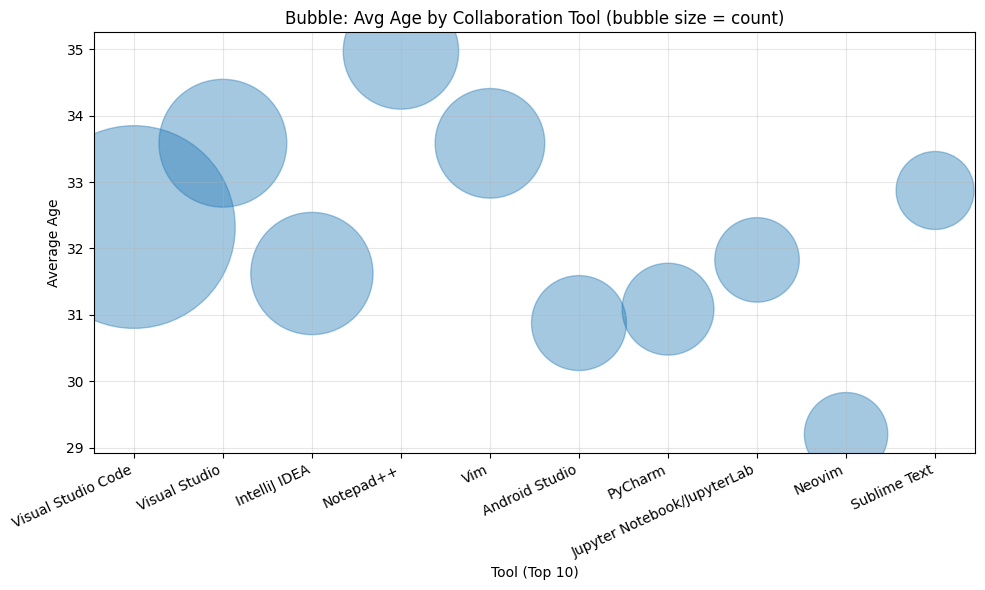

In [16]:
d0 = dfc.dropna(subset=["AgeNum","NEWCollabToolsHaveWorkedWith"]).copy()

tools = d0["NEWCollabToolsHaveWorkedWith"].astype(str).str.split(";").explode().str.strip()
rep = d0["NEWCollabToolsHaveWorkedWith"].astype(str).str.count(";").add(1).to_numpy()
age_rep = np.repeat(d0["AgeNum"].to_numpy(), rep)

tmp = pd.DataFrame({"Tool": tools, "AgeNum": age_rep}).dropna()
top = tmp["Tool"].value_counts().head(10).index.tolist()
tmp = tmp[tmp["Tool"].isin(top)]

agg = tmp.groupby("Tool").agg(avg_age=("AgeNum","mean"), count=("AgeNum","size")).reindex(top)

x = np.arange(len(agg))
sizes = agg["count"] * 0.5

plt.figure(figsize=(10,6))
plt.scatter(x, agg["avg_age"], s=sizes, alpha=0.4)
plt.title("Bubble: Avg Age by Collaboration Tool (bubble size = count)")
plt.xlabel("Tool (Top 10)")
plt.ylabel("Average Age")
plt.xticks(x, agg.index, rotation=25, ha="right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



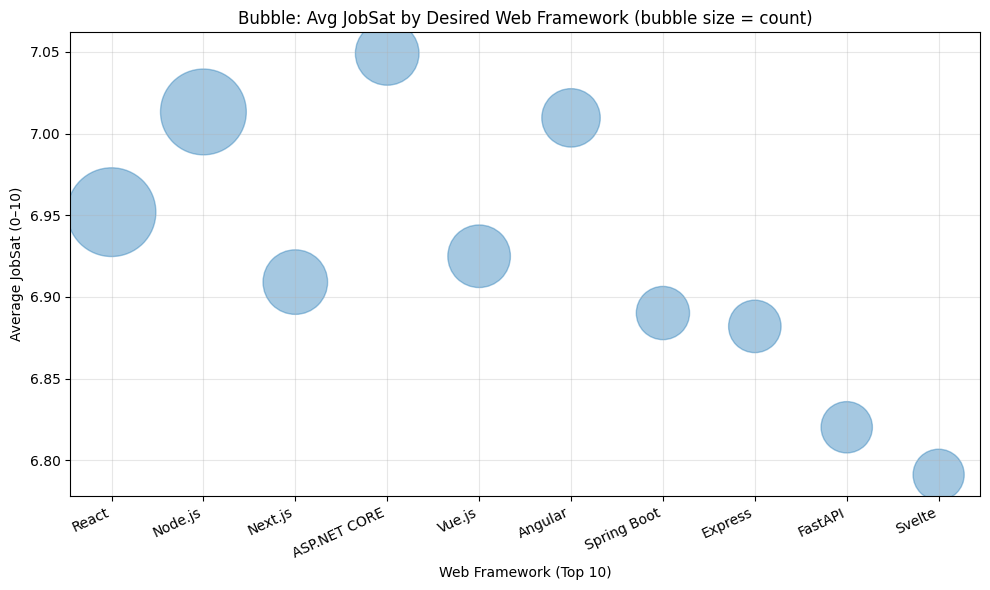

In [17]:
d0 = dfc.dropna(subset=["WebframeWantToWorkWith","JobSat_num"]).copy()
d0 = d0[(d0["JobSat_num"] >= 0) & (d0["JobSat_num"] <= 10)]

wf = d0["WebframeWantToWorkWith"].astype(str).str.split(";").explode().str.strip()
rep = d0["WebframeWantToWorkWith"].astype(str).str.count(";").add(1).to_numpy()
sat_rep = np.repeat(d0["JobSat_num"].to_numpy(), rep)

tmp = pd.DataFrame({"Webframe": wf, "JobSat": sat_rep}).dropna()
top = tmp["Webframe"].value_counts().head(10).index.tolist()
tmp = tmp[tmp["Webframe"].isin(top)]

agg = tmp.groupby("Webframe").agg(avg_jobsat=("JobSat","mean"), count=("JobSat","size")).reindex(top)

x = np.arange(len(agg))
sizes = agg["count"] * 0.5

plt.figure(figsize=(10,6))
plt.scatter(x, agg["avg_jobsat"], s=sizes, alpha=0.4)
plt.title("Bubble: Avg JobSat by Desired Web Framework (bubble size = count)")
plt.xlabel("Web Framework (Top 10)")
plt.ylabel("Average JobSat (0–10)")
plt.xticks(x, agg.index, rotation=25, ha="right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



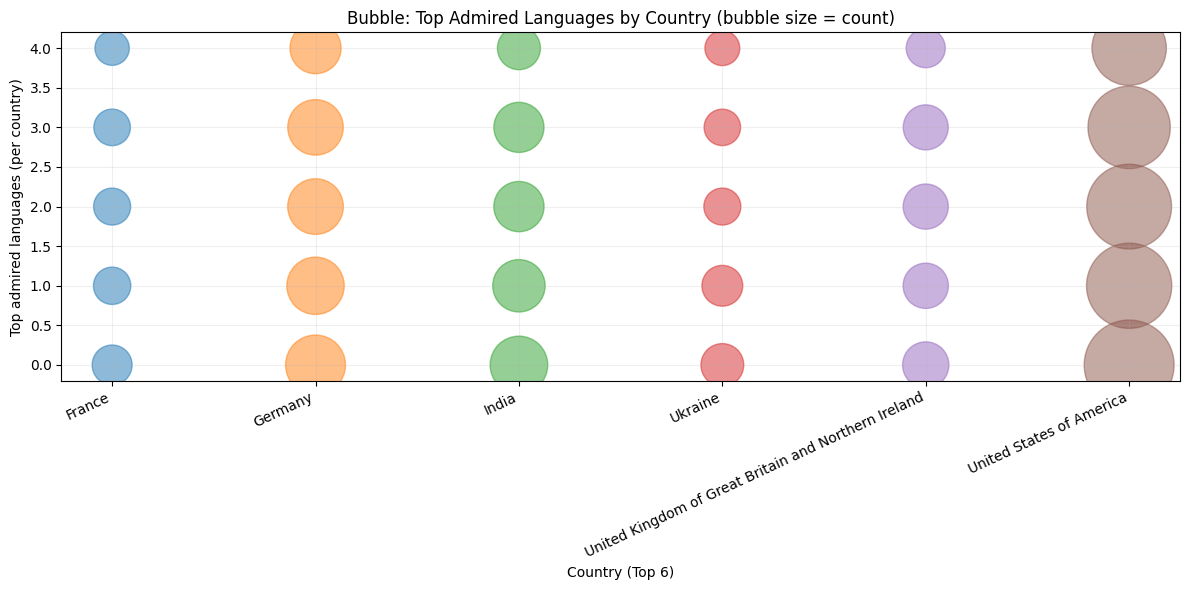

In [18]:
d0 = dfc.dropna(subset=["Country","LanguageAdmired"]).copy()
top_c = d0["Country"].value_counts().head(6).index.tolist()
d0 = d0[d0["Country"].isin(top_c)]

tech = d0["LanguageAdmired"].astype(str).str.split(";").explode().str.strip()
rep = d0["LanguageAdmired"].astype(str).str.count(";").add(1).to_numpy()
cty_rep = np.repeat(d0["Country"].to_numpy(), rep)

tmp = pd.DataFrame({"Country": cty_rep, "Tech": tech}).dropna()

# Keep top 5 tech per country
agg = tmp.groupby(["Country","Tech"]).size().reset_index(name="count")
agg = agg.sort_values(["Country","count"], ascending=[True, False]).groupby("Country").head(5)

countries = agg["Country"].unique().tolist()

plt.figure(figsize=(12,6))
for i,c in enumerate(countries):
    sub = agg[agg["Country"] == c].reset_index(drop=True)
    y = np.arange(len(sub))
    plt.scatter(np.full(len(sub), i), y, s=sub["count"], alpha=0.5)

plt.title("Bubble: Top Admired Languages by Country (bubble size = count)")
plt.xlabel("Country (Top 6)")
plt.ylabel("Top admired languages (per country)")
plt.xticks(range(len(countries)), countries, rotation=25, ha="right")
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


Interpretation: Larger bubbles indicate more admired technologies in that country’s responses; patterns show regional preferences.

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
